# Introdução à Estatística (Case Prático)
***

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" height="40px" style="position: absolute; top: 12px; right: 20px;" />

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

## Variáveis utilizadas

### Renda

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

### Idade

Idade do morador na data de referência em anos.

### Altura (elaboração própria)

Altura do morador em metros.

### UF

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

### Sexo

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

### Anos de Estudo

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

### Cor

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando as bibliotecas e lendo o dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
%matplotlib inline

sns.set()
pio.templates.default = "plotly_dark"

In [4]:
dataset = pd.read_csv("C:\\Users\\Fabio\\Desktop\\Data Science\\banco_dados\\pesquisa_domicilio.csv")

In [6]:
dataset.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=green>1. Tipos de dados</font>
***

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

Anos de estudo 

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

UF

Sexo

Cor

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

Idade

### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

Renda

Altura

## <font color=green>2. Distribuição de frequências</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***

### Obtenha a tabela e o gráfico de distribuição de frequências para a variável sexo

In [34]:
fi_sexo = df_sexo["Sexo"].value_counts()
fi_sexo

0    53250
1    23590
Name: Sexo, dtype: int64

In [35]:
fp_sexo = df_sexo["Sexo"].value_counts(normalize=True)*100
fp_sexo

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [40]:
freq_sexo = pd.DataFrame({"Frequência absoluta": fi_sexo, "Frequência percentual": fp_sexo})
freq_sexo

,Frequência absoluta,Frequência percentual
0,53250,69.299844
1,23590,30.700156


In [45]:
freq_sexo.rename(index={0: "Masculino", 1:"Feminino"}, inplace=True)

In [50]:
freq_sexo.rename_axis("Sexo")

,Frequência absoluta,Frequência percentual
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


### Obtenha a tabela e o gráfico de distribuição de frequências para a variável Sexo cruzada com os dados de Cor

In [60]:
# 1ª FORMA
pd.crosstab(index=dataset["Sexo"], columns=dataset["Cor"])

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [67]:
# 2ª FORMA
dataset.groupby(by=["Sexo", "Cor"]).agg({"Altura": np.count_nonzero}).unstack("Cor")

Altura                                 
Cor       0        2       4      6        8
Sexo                                        
0     256.0  22194.0  5502.0  235.0  25063.0
1     101.0   9621.0  2889.0  117.0  10862.0

In [69]:
# 3ª FORMA
dataset.groupby(by=["Sexo", "Cor"])\
.agg({"Altura": np.count_nonzero})\
.rename(columns={"Altura": "Contagem"})

Contagem
Sexo Cor          
0    0       256.0
     2     22194.0
     4      5502.0
     6       235.0
     8     25063.0
1    0       101.0
     2      9621.0
     4      2889.0
     6       117.0
     8     10862.0

## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso, <b>R$ 788,00</b> (considerando o ano de 2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


#### 1. Criar um dataframe que contenha essas classes personalizadas, utilizando o `pd.cut`.

In [70]:
dataset["Renda"]

0         800
1        1150
2         880
3        3500
4         150
         ... 
76835     812
76836    1500
76837    1300
76838    1500
76839     900
Name: Renda, Length: 76840, dtype: int64

In [76]:
renda_classes = pd.cut(dataset["Renda"],
       bins=[dataset["Renda"].min(), 1576, 3152, 7880, 15760, dataset["Renda"].max()],
       labels=["E", "D", "C", "B", "A"],
      include_lowest=True)

In [78]:
renda_classes.head()

0    E
1    E
2    E
3    C
4    E
Name: Renda, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [81]:
fi = renda_classes.value_counts()
fi

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [84]:
fp = renda_classes.value_counts(normalize=True)*100
fp

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [91]:
freq_renda_classes = pd.DataFrame({"Frequência absoluta": fi, "Frequência percentual": fp})
freq_renda_classes

,Frequência absoluta,Frequência percentual
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


<AxesSubplot:xlabel='Renda', ylabel='Count'>

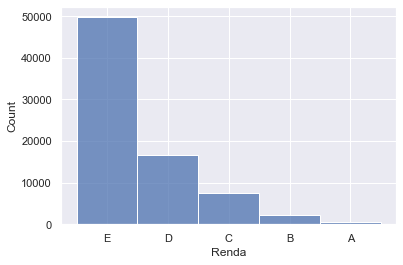

In [93]:
sns.histplot(renda_classes)

<BarContainer object of 5 artists>

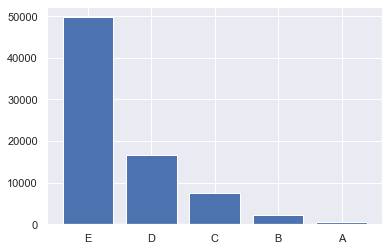

In [96]:
plt.bar(fi.index, fi.values)

<AxesSubplot:>

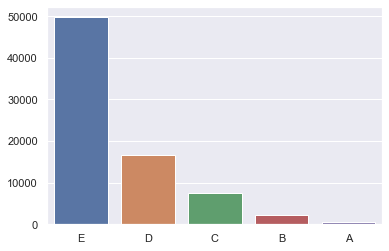

In [98]:
sns.barplot(x=fi.index, y=fi.values)

In [100]:
fi.sort_index(ascending=False)

A      608
B     2178
C     7599
D    16700
E    49755
Name: Renda, dtype: int64

<AxesSubplot:xlabel='Renda', ylabel='Probability'>

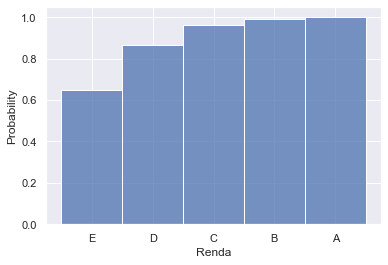

In [102]:
sns.histplot(x=renda_classes, cumulative=True, stat="probability")

#### 2. Criar a tabela de distribuição de frequências do dataframe obtido acima.

In [ ]:
# Já foi criado no item anterior

## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

Obtenha a tabela e o gráfico de distribuições de frequências da variável de renda, mas, dessa vez, utilizando a Regra de Sturges para definir as classes de amplitude fixa.

#### 1. Definindo o número de classes e criando o dataframe com as classes

#### Regra de Sturges

$$k = 1 + \frac{10}{3}\log_{10}n$$

In [103]:
# Calculando o 'n' => Total de elementos
n = dataset.shape[0]

In [104]:
n

76840

In [111]:
# Calculando o 'k'
k = 1 + (10/3)*np.log10(n)
k = round(k)
k

17

#### 2. Criando a tabela e o gráfico de distribução de frequências

In [112]:
pd.cut(dataset["Renda"], bins=k, include_lowest=True)

0        (-200.001, 11764.706]
1        (-200.001, 11764.706]
2        (-200.001, 11764.706]
3        (-200.001, 11764.706]
4        (-200.001, 11764.706]
                 ...          
76835    (-200.001, 11764.706]
76836    (-200.001, 11764.706]
76837    (-200.001, 11764.706]
76838    (-200.001, 11764.706]
76839    (-200.001, 11764.706]
Name: Renda, Length: 76840, dtype: category
Categories (17, interval[float64]): [(-200.001, 11764.706] < (11764.706, 23529.412] < (23529.412, 35294.118] < (35294.118, 47058.824] ... (152941.176, 164705.882] < (164705.882, 176470.588] < (176470.588, 188235.294] < (188235.294, 200000.0]]

In [115]:
renda_classes_qcut = pd.qcut(dataset["Renda"], q=k)
renda_classes_qcut

0            (788.0, 800.0]
1        (1000.0, 1162.529]
2            (800.0, 900.0]
3          (2800.0, 3500.0]
4           (-0.001, 160.0]
                ...        
76835        (800.0, 900.0]
76836      (1200.0, 1500.0]
76837      (1200.0, 1500.0]
76838      (1200.0, 1500.0]
76839        (800.0, 900.0]
Name: Renda, Length: 76840, dtype: category
Categories (17, interval[float64]): [(-0.001, 160.0] < (160.0, 400.0] < (400.0, 650.0] < (650.0, 788.0] ... (2100.0, 2800.0] < (2800.0, 3500.0] < (3500.0, 5500.0] < (5500.0, 200000.0]]

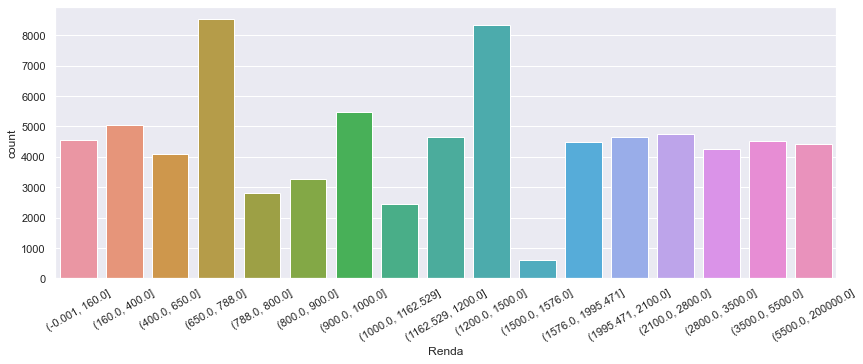

In [122]:
plt.figure(figsize=(14, 5))
sns.countplot(x=renda_classes_qcut)
plt.xticks(rotation=30)
plt.show()

## 3. Medidas de Tendência Central</font>
***

#### 3.1 Média aritmética

Calcule a média aritmética das variáveis `Anos de Estudo`, `Idade`, `Renda` e `Altura`.

#### 3.2 Mediana

Calcule a mediana das variáveis `Anos de Estudo`, `Idade`, `Renda` e `Altura`.

#### 3.3. Moda

Calcule a moda daquelas variáveis para as quais você imagina que faz sentido obter essa informação (com base no que vimos na aula).

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

Como fizemos durante a aula, avalie a relação entre a média, mediana e moda de algumas variáveis do seu conjunto de dados.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avalie a variável `Renda`

<AxesSubplot:xlabel='Renda', ylabel='Count'>

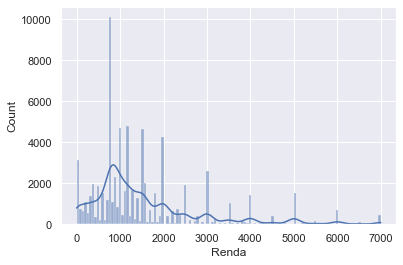

In [125]:
sns.histplot(dataset.query("Renda <= 7000")["Renda"], kde=True)

***

### Avalie a variável `Altura`

***

### Avalie a variável `Anos de estudo`

## 4. Medidas Separatrizes
***

### 4.1 Quartis, decis e percentis

Calcule os quartis, decis e percentis para a variável `Renda`.

### 4.2 Boxplot

Crie o boxplot para as variáveis `Renda`, `Altura`.

# <font color=green>5. Medidas de Dispersão</font>
***

Obtenha a variância e o desvio padrão das variáveis quantitativas do conjunto de dados. Em seguida, utilize o `seaborn` para plotar um gráfico de barras que exiba a média dessas variáveis quantitativas, em função da Unidade Federativa. Com o `seaborn` você também irá conseguir visualizar o desvio padrão da média para cada barra.